In [1]:
# Import libraries
import numpy as np
from glob import glob
import os

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib import colors

import rasterio as rio
from rasterio.plot import plotting_extent
from rasterio.mask import mask

import pandas as pd
import geopandas as gpd
from shapely.geometry import mapping, box
from shapely.geometry import Point, Polygon

import earthpy as et
import earthpy.spatial as es
import earthpy.clip as cl
import fiona

os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))

In [2]:
# Open boundary shapefile
boundary_path = os.path.join('data', 'final-project', 'cottonwood-heights-utah', 'vector-clip', 'utah-avalanche-clip.shp')
avalanche_boundary = gpd.read_file(boundary_path)
avalanche_boundary_4326 = avalanche_boundary.to_crs(epsg=4326)

In [3]:
# Open avalanche paths
avalanche_paths_filename = glob(os.path.join(
    'data', 'final-project', 'cottonwood-heights-utah', 'avalanche-paths', '*.shp'))
avalanche_paths = gpd.read_file(avalanche_paths_filename[0])
avalanche_paths_4326 = avalanche_paths.to_crs(epsg=4326)

# Clip avalanche paths to boundary
avalanche_clip = cl.clip_shp(avalanche_paths, avalanche_boundary)
avalanche_clip_4326 = cl.clip_shp(avalanche_paths_4326, avalanche_boundary_4326)

In [4]:
# Open avalanche stats
# Get list of paths for each input csv file and sort
data_fp = os.path.join('data', 'final-project',
                       'cottonwood-heights-utah', 'avalanche-data', 'output')
input_csv_fn = glob(os.path.join(data_fp + '/site*.csv'))
avalanche_2011_df = pd.read_csv(input_csv_fn[0])
avalanche_2014_df = pd.read_csv(input_csv_fn[1])
avalanche_2017_df = pd.read_csv(input_csv_fn[2])

# Put the latitude and longitude for each year from the dataframe into numpy array
lats_lons_2011 = avalanche_2011_df.iloc[:,7:9].values
lats_lons_2014 = avalanche_2014_df.iloc[:,7:9].values
lats_lons_2017 = avalanche_2017_df.iloc[:,7:9].values

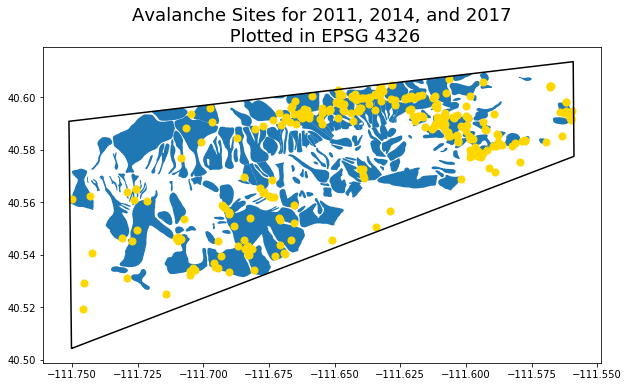

In [5]:
# Plot in EPSG 4326
# Plot clipped avalanche paths
fig, ax1 = plt.subplots(figsize=(10, 10))
avalanche_clip_4326.plot(ax=ax1)
avalanche_boundary_4326.boundary.plot(ax=ax1, color="black")
ax1.set_title('Avalanche Sites for 2011, 2014, and 2017\n Plotted in EPSG 4326', fontsize=18)

# Loop through each 2011 lat/lon, convert to geopandas dataframe, and plot
for coord_2011 in lats_lons_2011:
    avi_site = np.array([[coord_2011[1], coord_2011[0]]]) # longtitude, latitude
    geometry = [Point(xy) for xy in avi_site]
    point_loc = gpd.GeoDataFrame(geometry,
                                 columns=['geometry'],
                                 crs={'init': 'epsg:4326'})
    point_loc.plot(ax=ax1,
                   markersize=50,
                   color='gold')
    
# Loop through each 2014 lat/lon, convert to geopandas dataframe, and plot
for coord_2014 in lats_lons_2014:
    avi_site = np.array([[coord_2014[1], coord_2014[0]]]) # longtitude, latitude
    geometry = [Point(xy) for xy in avi_site]
    point_loc = gpd.GeoDataFrame(geometry,
                                 columns=['geometry'],
                                 crs={'init': 'epsg:4326'})
    point_loc.plot(ax=ax1,
                   markersize=50,
                   color='gold')
    
# Loop through each 2017 lat/lon, convert to geopandas dataframe, and plot
for coord_2017 in lats_lons_2017:
    avi_site = np.array([[coord_2017[1], coord_2017[0]]]) # longtitude, latitude
    geometry = [Point(xy) for xy in avi_site]
    point_loc = gpd.GeoDataFrame(geometry,
                                 columns=['geometry'],
                                 crs={'init': 'epsg:4326'})
    point_loc.plot(ax=ax1,
                   markersize=50,
                   color='gold')

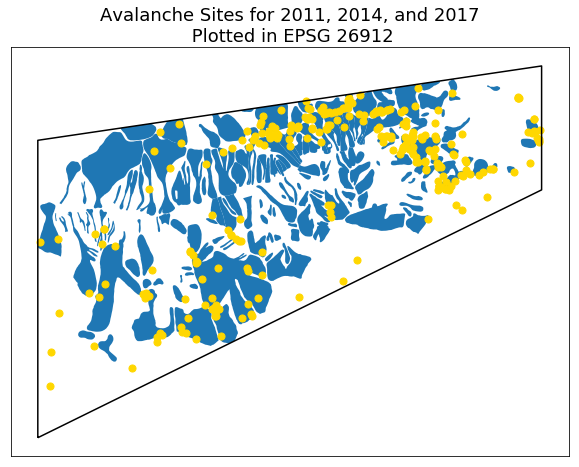

In [6]:
# Plot in EPSG 26912
# Plot clipped avalanche paths
fig, ax1 = plt.subplots(figsize=(10, 10))
avalanche_clip.plot(ax=ax1)
avalanche_boundary.boundary.plot(ax=ax1, color="black")
ax1.set_title('Avalanche Sites for 2011, 2014, and 2017\n Plotted in EPSG 26912', fontsize=18)

# Loop through each 2011 lat/lon, convert to geopandas dataframe, and plot
for coord_2011 in lats_lons_2011:
    avi_site = np.array([[coord_2011[1], coord_2011[0]]]) # longtitude, latitude
    geometry = [Point(xy) for xy in avi_site]
    point_loc = gpd.GeoDataFrame(geometry,
                                 columns=['geometry'],
                                 crs={'init': 'epsg:4326'})
    point_loc.to_crs(epsg=26912).plot(ax=ax1,
                   markersize=50,
                   color='gold')
    
# Loop through each 2014 lat/lon, convert to geopandas dataframe, and plot
for coord_2014 in lats_lons_2014:
    avi_site = np.array([[coord_2014[1], coord_2014[0]]]) # longtitude, latitude
    geometry = [Point(xy) for xy in avi_site]
    point_loc = gpd.GeoDataFrame(geometry,
                                 columns=['geometry'],
                                 crs={'init': 'epsg:4326'})
    point_loc.to_crs(epsg=26912).plot(ax=ax1,
                   markersize=50,
                   color='gold')
    
# Loop through each 2017 lat/lon, convert to geopandas dataframe, and plot
for coord_2017 in lats_lons_2017:
    avi_site = np.array([[coord_2017[1], coord_2017[0]]]) # longtitude, latitude
    geometry = [Point(xy) for xy in avi_site]
    point_loc = gpd.GeoDataFrame(geometry,
                                 columns=['geometry'],
                                 crs={'init': 'epsg:4326'})
    point_loc.to_crs(epsg=26912).plot(ax=ax1,
                   markersize=50,
                   color='gold')

# turn off axis
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)